<a href="https://colab.research.google.com/github/somyamangla/SupervisedLearningAlgorithm/blob/main/Random_Forest_Regessor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df=pd.read_csv('cardekho_data.csv')

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.shape

(301, 9)

In [ ]:
df.Fuel_Type.unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [ ]:
df.Seller_Type.unique()

array(['Dealer', 'Individual'], dtype=object)

In [ ]:
df.Transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [ ]:
df.Owner.unique()

array([0, 1, 3])

In [ ]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
df['current_year']=2021

In [ ]:
df['no_of_year']=df['current_year']=df['Year']

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year,no_of_year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2014,2014
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2013,2013
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2017,2017
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2011,2011
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2014,2014


In [ ]:
df.drop(['Car_Name','Year','current_year'],axis=1,inplace=True)

In [ ]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_of_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,2014
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,2013
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,2017
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,2011
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,2014


In [ ]:
df=pd.get_dummies(df)

In [ ]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_of_year,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,5.59,27000,0,2014,0,0,1,1,0,0,1
1,4.75,9.54,43000,0,2013,0,1,0,1,0,0,1
2,7.25,9.85,6900,0,2017,0,0,1,1,0,0,1
3,2.85,4.15,5200,0,2011,0,0,1,1,0,0,1
4,4.60,6.87,42450,0,2014,0,1,0,1,0,0,1


In [ ]:
df.drop(['Fuel_Type_CNG','Seller_Type_Dealer','Transmission_Automatic'],axis=1,inplace=True)

In [ ]:
df.shape

(301, 9)

In [ ]:
df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_of_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,-0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,-0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,-0.182104,-0.053469,0.055687,0.124269,-0.050316
no_of_year,0.236141,-0.047584,-0.524342,-0.182104,1.000000,0.064315,-0.059959,-0.039896,0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,-0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,-0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,0.000394,-0.098643,0.091013,0.063240,1.000000


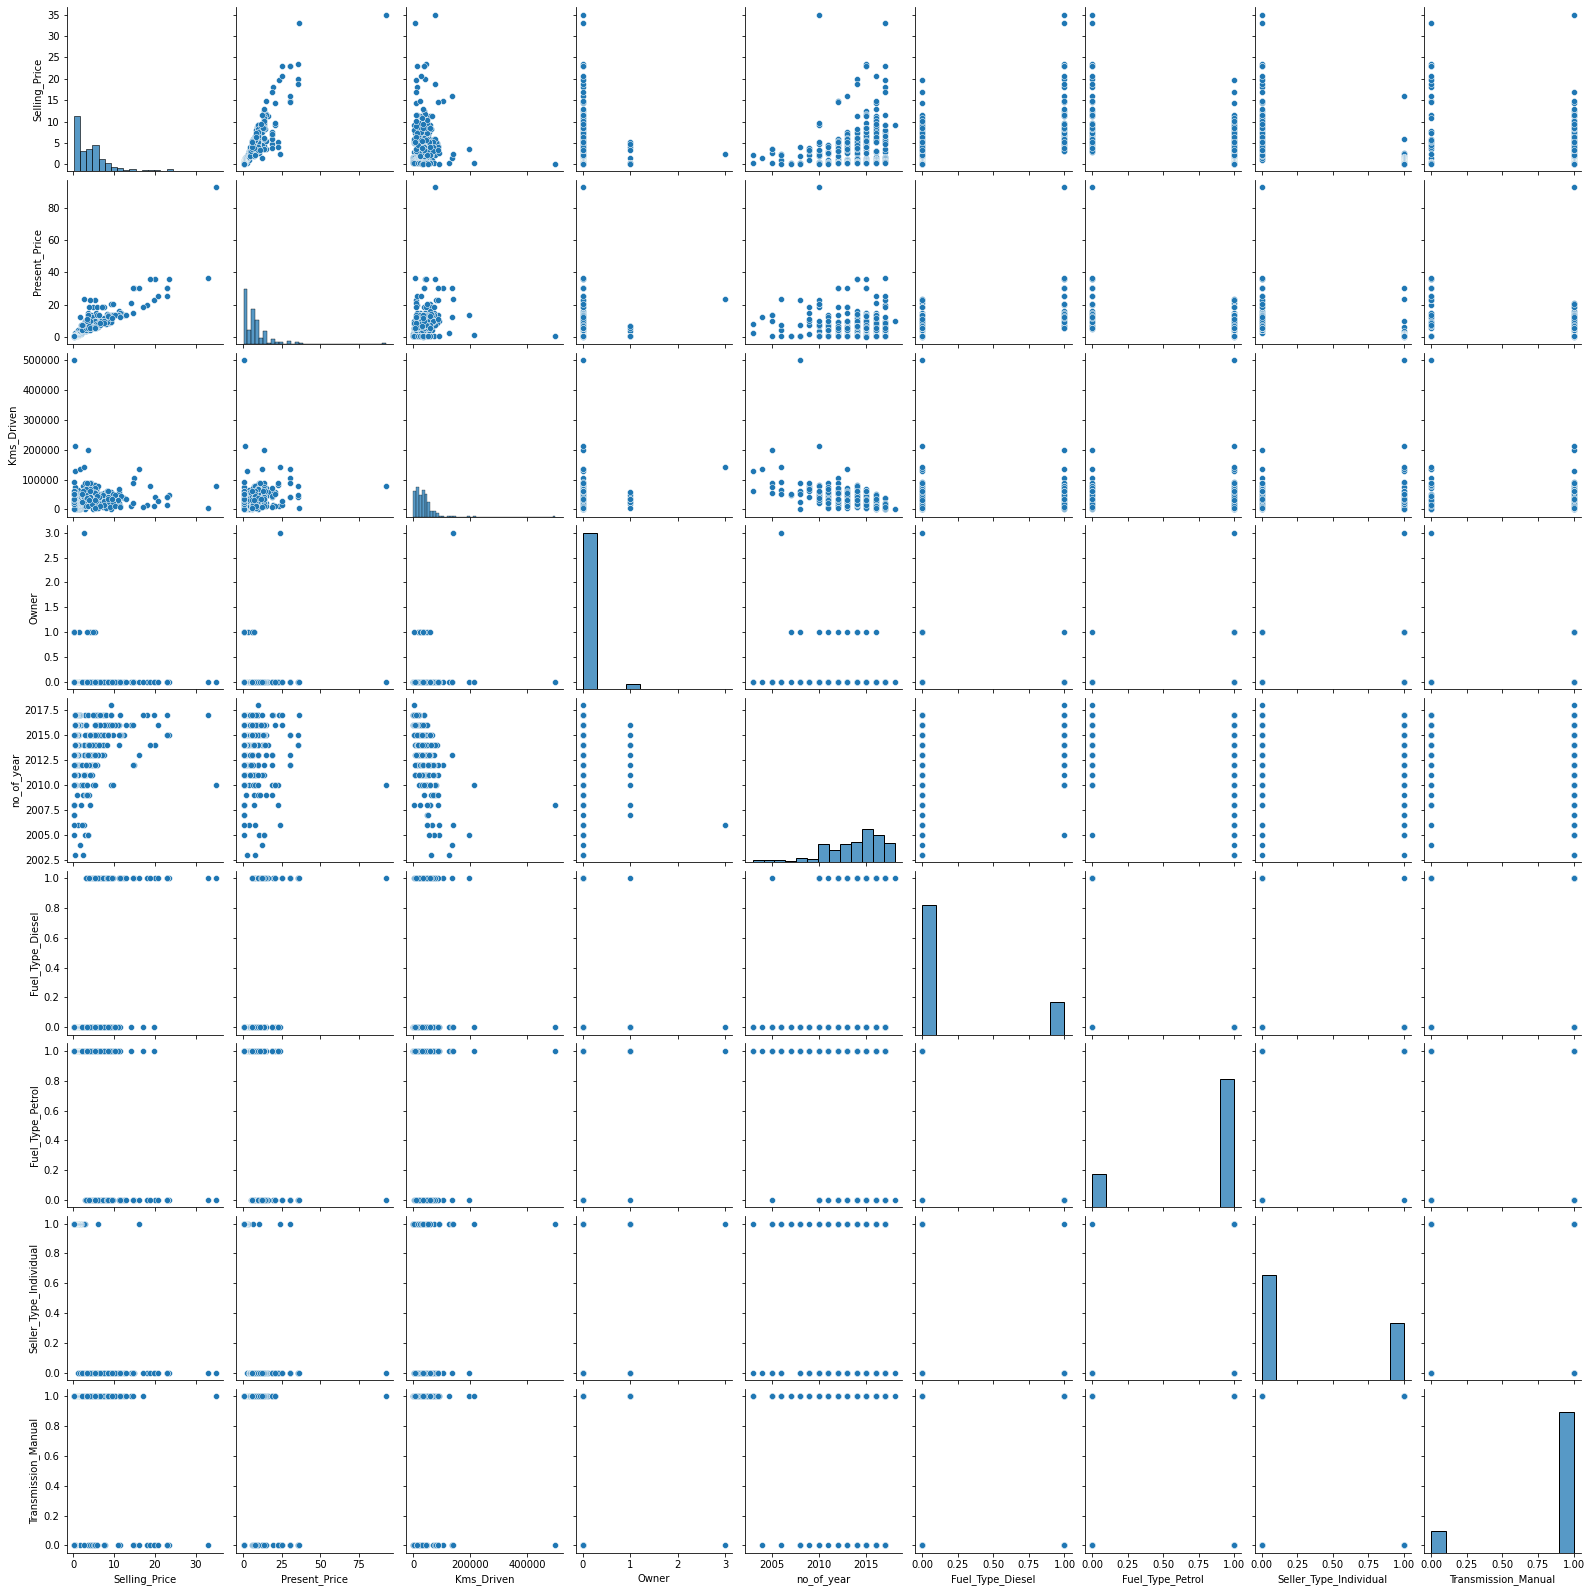

In [ ]:
sns.pairplot(df)

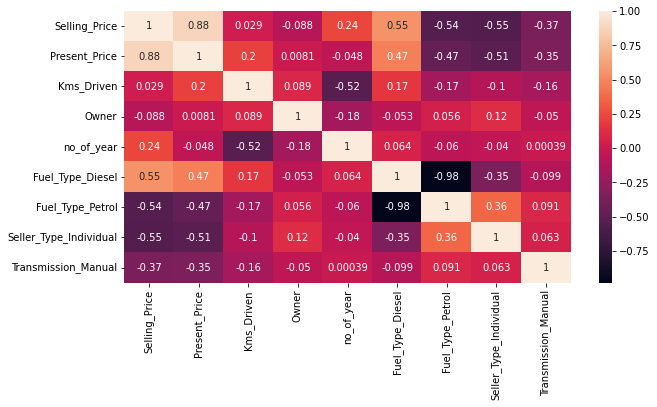

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

In [ ]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
model=ExtraTreesRegressor()
feat_imp=model.fit(x,y)
feat_imp.feature_importances_

array([0.38001807, 0.04021755, 0.00085521, 0.07875508, 0.22408876,
       0.01211589, 0.13430862, 0.12964081])

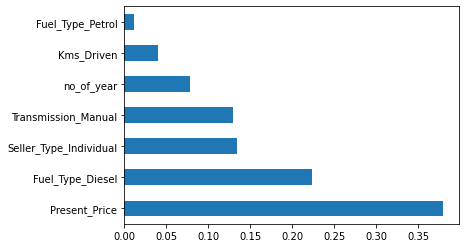

In [ ]:
imp=pd.Series(feat_imp.feature_importances_,index=x.columns)
imp.nlargest(7).plot(kind='barh')

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=2, random_state=8)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()

In [ ]:
regressor.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred= regressor.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

-0.7030436295525642